# Titanic
Vamos a usar machine learning para crear un modelo que predejia que pasajeros sobrevivieron al Titanic Shipwreck
<img src="./variables.png">


# Análisis Exploratorio de Datos (EDA)

### Librerias

Vamos a iniciar importando las librerias que vamos a ocupar para el análisis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc

### Exploración de datos

Comenzamos viendo el tamaño y la estructura de nuestros datos, y modificando el tipo de formato de salida para al imprimir los datos tengamos mejor estructura de ellos

In [2]:
df_train = pd.read_csv('./Titanic/train.csv')
df_test = pd.read_csv('./Titanic/test.csv')
pd.options.display.float_format = '{:,.2f}'.format
print(df_train.shape)
df_train.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Podemos observar que tenemos 12 columnas con 891 filas, podemos darnos cuenta que tenemos 2 columnas con mucha falta de información, mas adelante veremos como manejar los datos faltantes.

A continuación vamos dar un visto al data set para comenzar 

In [3]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [4]:
df_train.describe(include='all').fillna('-')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,-,-,-,891,2,-,-,-,681,-,147,3
top,-,-,-,"Klasen, Mr. Klas Albin",male,-,-,-,1601,-,G6,S
freq,-,-,-,1,577,-,-,-,7,-,4,644
mean,446.00,0.38,2.31,-,-,29.70,0.52,0.38,-,32.20,-,-
std,257.35,0.49,0.84,-,-,14.53,1.10,0.81,-,49.69,-,-
min,1.00,0.00,1.00,-,-,0.42,0.00,0.00,-,0.00,-,-
25%,223.50,0.00,2.00,-,-,20.12,0.00,0.00,-,7.91,-,-
50%,446.00,0.00,3.00,-,-,28.00,0.00,0.00,-,14.45,-,-
75%,668.50,1.00,3.00,-,-,38.00,1.00,0.00,-,31.00,-,-


Podemos observar que la edad promedio es de 29 años pero hay que tener en cuenta que hay datos faltantes, tambien podemos observar que el precio del ticket promedio era de 32.20, el precio mas alto 512 y tambien hubieron viajes gratis o cortesias, Sibsp y Parch nos da la información para saber con cuanta familia venia el sujeto, podemos ver que la mayoria viaja solo.

Podemos observar que hubo mas muertos que sobrevivientes.

### Columna Survive
Vamos a analizar nuestra columna mas importante, ya que es el resultado que queremos predecir en nuestro modelo, para realizar esta exploracion trataremos de contestar las siguientes preguntas
- ¿Cuantas personas sobrevivieron y cuantas murieron?
- ¿Cuantos hombres y mujeres sobrevivieron?
- ¿Qué edad fue la que predomino en las personas que sobrevieron?
- ¿Qué edad tenia la persona mas vieja y joven en sobrevivir?
- ¿De qué clase sobrevieron más personas?
- ¿Que edad promedio tienen las personas de cada clase que sobrevivieron?
- ¿Existe alguna relación entre el lugar donde embarcaron y la posibilidad de sobrevivir?
- ¿Los que sobrevivieron tenian familia o venian solos?
- ¿Existe una relación entre el costo del ticket y la posibilidad de sobrevivir?

#### ¿Cuantas personas sobrevivieron y cuantas murieron?

In [5]:
df_train.groupby(['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

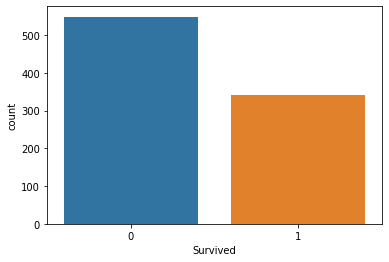

In [6]:
sns.countplot(x=df_train['Survived'])

#### ¿Cuantos hombres y mujeres sobrevivieron?

In [7]:
df_train.groupby(['Survived', 'Sex'])['Sex'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

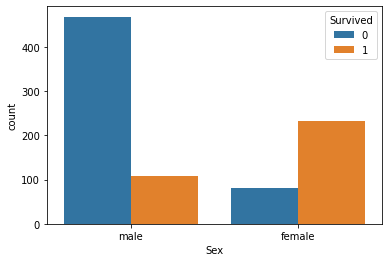

In [8]:
sns.countplot(data=df_train, x='Sex', hue='Survived')

#### ¿Qué edad fue la que predomino en las personas que sobrevieron?
#### ¿Qué edad tenia la persona mas vieja y joven en sobrevivir?

In [9]:
edad = { 'Age': [min,max, np.mean, np.median]}
df_train.groupby(['Survived', 'Sex']).aggregate(edad)

Age                   
                 min   max  mean median
Survived Sex                           
0        female 2.00 57.00 25.05  24.50
         male   1.00 74.00 31.62  29.00
1        female 0.75 63.00 28.85  28.00
         male   0.42 80.00 27.28  28.00

<AxesSubplot:xlabel='Survived', ylabel='Age'>

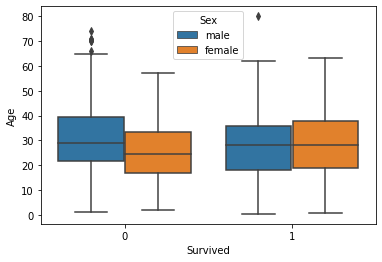

In [10]:
sns.boxplot(data=df_train, x='Survived', y='Age', hue='Sex')

In [11]:
niños = df_train[df_train['Age'] < 18.0]
num_niños = len(niños['PassengerId'])/len(df_train['Age'].notnull())*100
print(f'Porcentage of kids a board {num_niños} \nHow many kids are? {len(niños)}')
niños.groupby(['Survived', 'Sex']).aggregate(edad)

Porcentage of kids a board 12.682379349046016 
How many kids are? 113


Age                   
                 min   max  mean median
Survived Sex                           
0        female 2.00 17.00  8.44   9.00
         male   1.00 17.00 11.34  14.00
1        female 0.75 17.00  9.59  10.50
         male   0.42 17.00  5.07   3.00

#### ¿De qué clase sobrevieron más personas?

In [12]:
df_train.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [13]:
ticket_class = df_train.groupby(['Survived', 'Pclass'])['Survived'].count()
print(ticket_class)
print(ticket_class.groupby(level=0).apply(lambda x: x/ x.sum() *100))
print(ticket_class.groupby(level=1).apply(lambda x: x/ x.sum() *100))

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64
Survived  Pclass
0         1        14.57
          2        17.67
          3        67.76
1         1        39.77
          2        25.44
          3        34.80
Name: Survived, dtype: float64
Survived  Pclass
0         1        37.04
          2        52.72
          3        75.76
1         1        62.96
          2        47.28
          3        24.24
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Survived', ylabel='count'>

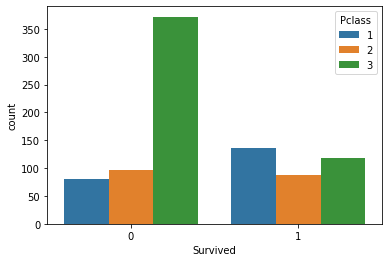

In [14]:
sns.countplot(data=df_train, x='Survived', hue='Pclass')

#### ¿Que edad promedio tienen las personas de cada clase que sobrevivieron?

In [15]:
df_train.groupby(['Survived', 'Pclass'])['Age'].mean()
df_train.groupby(['Survived', 'Pclass'])['Age'].mean().groupby(level=1).apply(lambda x: np.mean(x))

Pclass
1   39.53
2   29.72
3   23.60
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

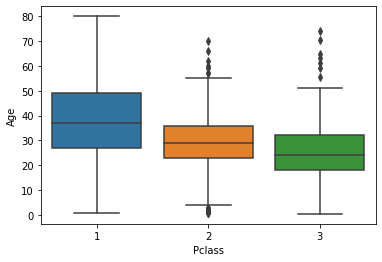

In [16]:
sns.boxplot(x=df_train['Pclass'], y=df_train['Age'])

#### ¿Existe alguna relación entre el lugar donde embarcaron y la posibilidad de sobrevivir?

In [17]:
df_train.groupby(['Survived', 'Embarked'])['Survived'].count()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

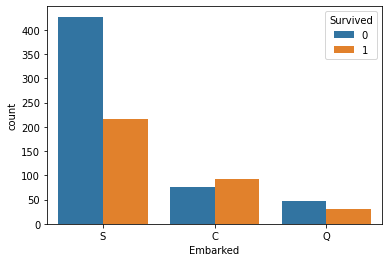

In [18]:
sns.countplot(data=df_train, x='Embarked', hue='Survived')

#### ¿Los que sobrevivieron tenian familia o venian solos?

In [19]:
df_train.groupby(['Survived', 'SibSp', 'Parch'])['Survived'].count().unstack().fillna('-')

Parch               0     1     2    3    4    5    6
Survived SibSp                                       
0        0     374.00 13.00  8.00    - 1.00 2.00    -
         1      59.00 23.00  7.00 2.00 3.00 2.00 1.00
         2      12.00  1.00  2.00    -    -    -    -
         3          -  7.00  5.00    -    -    -    -
         4          -  9.00  6.00    -    -    -    -
         5          -     -  5.00    -    -    -    -
         8          -     -  7.00    -    -    -    -
1        0     163.00 25.00 21.00 1.00    -    -    -
         1      64.00 34.00 12.00 1.00    - 1.00    -
         2       4.00  6.00  2.00 1.00    -    -    -
         3       2.00     -  2.00    -    -    -    -
         4          -     -  3.00    -    -    -    -

<AxesSubplot:xlabel='SibSp', ylabel='Parch'>

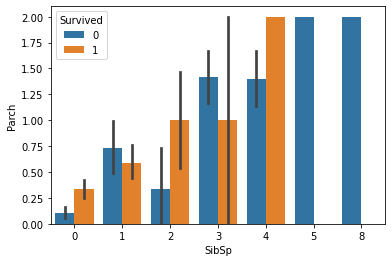

In [20]:
sns.barplot(data=df_train, x='SibSp', y='Parch', hue='Survived')

In [21]:
df_test['Family'] = np.where(((df_test['Parch'] > 0) & (df_test['SibSp'] > 0)), 1, 0)
df_train['Family'] = np.where(((df_train['Parch'] > 0) & (df_train['SibSp'] > 0)), 1, 0)
df_train['Family'].value_counts()

0    749
1    142
Name: Family, dtype: int64

<AxesSubplot:xlabel='Family', ylabel='count'>

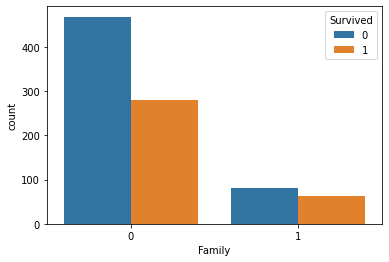

In [22]:
sns.countplot(data=df_train, x='Family', hue='Survived')

#### ¿Existe una relación entre el costo del ticket y la posibilidad de sobrevivir?

In [23]:
pd.cut(df_train['Fare'], bins= 3).value_counts()

(-0.512, 170.776]     871
(170.776, 341.553]     17
(341.553, 512.329]      3
Name: Fare, dtype: int64

In [24]:
df_test['Cost'] = pd.cut(df_test['Fare'], bins= [-1,171,342,513])
df_train['Cost'] = pd.cut(df_train['Fare'], bins= [-1,171,342,513])
df_train['Cost'].sample(5)

484    (-1, 171]
760    (-1, 171]
801    (-1, 171]
81     (-1, 171]
745    (-1, 171]
Name: Cost, dtype: category
Categories (3, interval[int64]): [(-1, 171] < (171, 342] < (342, 513]]

<AxesSubplot:xlabel='Cost', ylabel='count'>

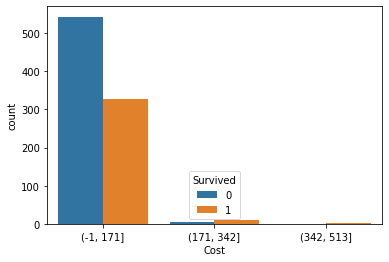

In [25]:
sns.countplot(data=df_train, x='Cost', hue='Survived')

In [26]:
df_train.groupby(['Survived', 'Cost'])['Survived'].count()

Survived  Cost      
0         (-1, 171]     543
          (171, 342]      6
          (342, 513]      0
1         (-1, 171]     328
          (171, 342]     11
          (342, 513]      3
Name: Survived, dtype: int64

#### Conclusión

Sobrevivieron el 38% (342) personas de las 891 que se tiene registro que iban a bordo, la mayoría de los sobrevivientes eran mujeres, la  edad promedio de los sobrevivientes era de 28 años, la tercera Clase fue donde hubo mas muertes, la mayoría de los personas abordo venían sin familia y algo curioso es que las 3 personas con el boleto mas caro sobrevivieron

### Data cleaning

In [27]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
Cost             0
dtype: int64

We've 2 columns with data missing one of them have almost 70% of data missing this is a lot of data thats why we gonna drop that column, the other in this case Age we are going to fill the data with data from average age from each class

Tenemos 2 columnas con datos faltantes, una de ellas tiene mas del 70% de los datos faltantes, debido a que hay demasiados datos faltantes y no tenemos manera de llenar los datos, la otra columna es muy importante ya que la edad influye mucho en la capacidad de supervivencia

Para tratar estos datos perdidos de esta columna vamos a aplicar el metodo de imputación, en este caso vamos a crear una funcion que dependiendo si se salvo o murio y en que clase iba vamos añadir la edad promedio

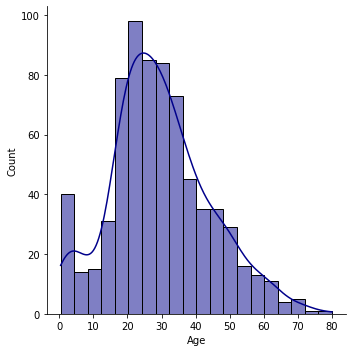

In [28]:
sns.displot(df_train['Age'].dropna(), kde=True, color='darkblue')

In [29]:
df_train.groupby('Pclass')['Age'].mean()

Pclass
1   38.23
2   29.88
3   25.14
Name: Age, dtype: float64

In [30]:
class_age = {
    1:38,
    2:29,
    3:25
}

In [31]:
def fill_age(columns):
    age = columns[0]
    pclass = np.int64(columns[1])
    return class_age[pclass] if pd.isnull(age) else age

In [32]:
df_test['Age'] = df_test[['Age', 'Pclass']].apply(fill_age, axis=1)
df_train['Age'] = df_train[['Age', 'Pclass']].apply(fill_age, axis=1)
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
Cost             0
dtype: int64

In [33]:
df_test = df_test.drop(columns='Cabin')
df_train_clean = df_train.drop(columns='Cabin')
df_train_clean.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Cost
548,549,0,3,"Goldsmith, Mr. Frank John",male,33.00,1,1,363291,20.52,S,1,"(-1, 171]"
682,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.00,0,0,6563,9.22,S,0,"(-1, 171]"
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.00,C,0,"(-1, 171]"
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.00,1,5,347077,31.39,S,1,"(-1, 171]"
387,388,1,2,"Buss, Miss. Kate",female,36.00,0,0,27849,13.00,S,0,"(-1, 171]"


### Data blending 
En este caso no contamos con otro dataset para unirlo entonces saltamos este paso

### ETL (Extract-Transfer-Load)
No podemos añadir datos de otra fuente externa

### Data wrangling
Hacemos que los datos sean digestibles para nuestro modelo, vamos a cambiar el tipo de variables a las adecuadas, vamos a elegir las columnas que vamos a ocupar en nuestro modelo

In [34]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    object  
 11  Family       891 non-null    int64   
 12  Cost         891 non-null    category
dtypes: category(1), float64(2), int64(6), object(4)
memory usage: 84.8+ KB


Vamos a elegir los datos que preparamos ['Survived', 'Pclass', 'Sex', 'Age', 'Family', 'Cost'] con estos datos vamos a entrenar nuestro modelo vamos a cambiar su dtype

In [35]:
df_test[['T_cheap', 'T_medium', 'T_expensive']] = pd.get_dummies(df_test['Cost'])
df_train_clean[['T_cheap', 'T_medium', 'T_expensive']] = pd.get_dummies(df_train_clean['Cost'])

In [36]:
df_train_clean[['Survived', 'Pclass', 'Family', 'Cost', 'Sex']] = df_train_clean[['Survived', 'Pclass', 'Family', 'Cost', 'Sex']].astype('category')
df_test[['Pclass', 'Family', 'Cost', 'Sex']] = df_test[['Pclass', 'Family', 'Cost', 'Sex']].astype('category')

In [37]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    object  
 11  Family       891 non-null    category
 12  Cost         891 non-null    category
 13  T_cheap      891 non-null    uint8   
 14  T_medium     891 non-null    uint8   
 15  T_expensive  891 non-null    uint8   
dtypes: category(5), float64(2), int64(3), object(3), uint8(3)
memory usage: 63.5+ KB


In [38]:
print(pd.get_dummies(df_train_clean['Sex']))
df_test[['Female', 'Male']] = pd.get_dummies(df_test['Sex'])
df_train_clean[['Female', 'Male']] = pd.get_dummies(df_train_clean['Sex'])
df_train_clean[['Female', 'Male']]


     female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]


,Female,Male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


## Entrenamiento Modelo
Debido a nuestra salida es 0 o 1 vamos a utilizar un modelo de regresion logistica para que sea más preciso que el de regresion lineal

### Librerias

In [39]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### Entrenamiento

In [56]:
feature_columns = ['Age', 'Pclass', 'Female', 'Male', 'Family', 'T_cheap', 'T_medium', 'T_expensive']
x = df_train_clean[feature_columns]
y = df_train_clean['Survived']

# Modelo de regresion logistica
logreg = LogisticRegression()
logreg.fit(x, y)

# Modelo de arboles de decisión 
tree_one = DecisionTreeClassifier()
tree_one.fit(x, y)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

### Evaluacion del modelo
Para evaluar el modelo vamos a ocupar la matriz de confusion y la exactitud

AxesSubplot(0.125,0.125;0.775x0.755)
0.8047138047138047


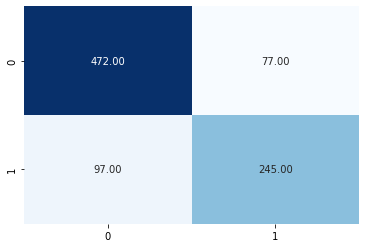

In [41]:
# labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
# labels = np.asarray(labels).reshape(2,2)

# Modelo de regresion logistica
y_predict = logreg.predict(x)
cf_matrix = metrics.confusion_matrix(y, y_predict)
print(sns.heatmap(cf_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=False))
print(metrics.accuracy_score(y, y_predict))


AxesSubplot(0.125,0.125;0.775x0.755)
0.8967452300785634


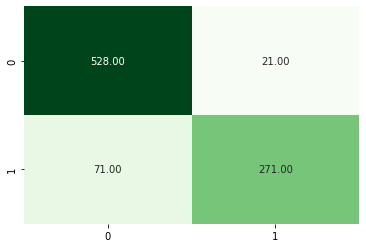

In [57]:
# Modelo de arbol de decisición
y_tree_predict = tree_one.predict(x)
cf_matrix_tree = metrics.confusion_matrix(y, y_tree_predict)
print(sns.heatmap(cf_matrix_tree, annot=True, fmt='.2f', cmap='Greens', cbar=False))
print(metrics.accuracy_score(y, y_tree_predict))

In [43]:
def conf_mat_acc(modelo):
    disp = metrics.plot_confusion_matrix(modelo, x, y, cmap=plt.cm.Blues, values_format="d")
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print('accuracy: ', np.round(accuracy, 3))
    plt.show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
accuracy:  0.805


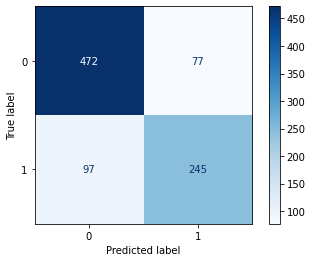

In [44]:
conf_mat_acc(logreg)

### Predicción
Hacemos la prediccion sobre el dataset de test

In [45]:
# Modelo de regresión logistica
x_test = df_test[['Age', 'Pclass', 'Female', 'Male', 'Family', 'T_cheap', 'T_medium', 'T_expensive']]
x_test.to_csv('./Titanic/pruebaUnitaria.csv')
df_test['Survived'] = tree_one.predict(x_test)
data_send = df_test[['PassengerId', 'Survived']]
data_send.to_csv('answer.csv', index=False)

In [62]:
# Prueba unitaria
df_prueba = pd.read_csv('./Titanic/pruebaUnitaria.csv')
x_test = df_prueba[['Age', 'Pclass', 'Female', 'Male', 'Family', 'T_cheap', 'T_medium', 'T_expensive']]
df_prueba['Survived'] = tree_one.predict(x_test)
data_send = df_prueba['Survived']
data_send.to_csv('./Titanic/pruebaUnitariaRespuesta.csv', index=False)

## Visualización

In [47]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [48]:
# Visualizacion de superviviente
def visualizacion(respuesta):
    if respuesta == 1:
        img = mpimg.imread('./Image/success.png')
    else:
        img = mpimg.imread('./Image/fail.png')
    plt.imshow(img)
    plt.title("¿Sobreviviste?", {'fontsize':24})
    plt.axis(False)
    
    plt.show()

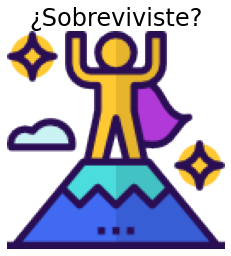

In [63]:
resultado = pd.read_csv('./Titanic/pruebaUnitariaRespuesta.csv')
visualizacion(resultado['Survived'][0])


In [59]:
pip install pydotplus

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [61]:
from io import StringIO
from IPython.display import Image, display
from sklearn import tree
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file = out)
graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('Titanic.png')

True

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8c011bec-3ddd-485d-ae27-20c050adddad' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>